<a href="https://colab.research.google.com/github/ssok-12/MMDT_2025_MLAI101/blob/main/saisaiohumkhay/midterm_project/IntroToML_Midterm_Project(SaiSaiOhumKhay).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
stu_data = pd.read_csv('/content/StudentPerformanceFactors.csv')
stu_data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [53]:
stu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [54]:
stu_data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [55]:
stu_data.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [56]:
from sklearn.model_selection import train_test_split
X = stu_data[['Hours_Studied', 'Attendance','Tutoring_Sessions','Previous_Scores']].values
y = stu_data[['Exam_Score']].values

X_train, X_test, y_train, y_test = train_test_split (X, y,
                                    test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)

(4624, 4) (1983, 4)


In [57]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_scaled = scale.fit_transform(X_train)


In [58]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_scaled,y_train)

print(lr.coef_, lr.intercept_)

[[1.72466081 2.30500095 0.63822071 0.70994562]] [67.23680796]


In [66]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
ytrain_pred = lr.predict(X_scaled)
mae = mean_absolute_error(y_train, ytrain_pred)
print('Evaluation Metrics for training data set: ')
print('Mean absolute error: ', np.round(mae,2))

mse = mean_squared_error(y_train, ytrain_pred)
print('Mean squared error: ', np.round(mse,2))

r2 = r2_score(y_train, ytrain_pred)
print('R2 score is: ', np.round(r2,2))

Evaluation Metrics for training data set: 
Mean absolute error:  1.34
Mean squared error:  6.61
R2 score is:  0.58


In [67]:
X_test_scaled = scale.transform(X_test)
ytest_pred = lr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, ytest_pred)
print('Evaluation Metrics for test dataset:')
print('Mean absolute error: ', np.round(mae,2))

mse = mean_squared_error(y_test, ytest_pred)
print('Mean squared error: ', np.round(mse,2))

r2 = r2_score(y_test, ytest_pred)
print('R2 score is: ', np.round(r2,2))

Evaluation Metrics for test dataset:
Mean absolute error:  1.28
Mean squared error:  4.93
R2 score is:  0.64


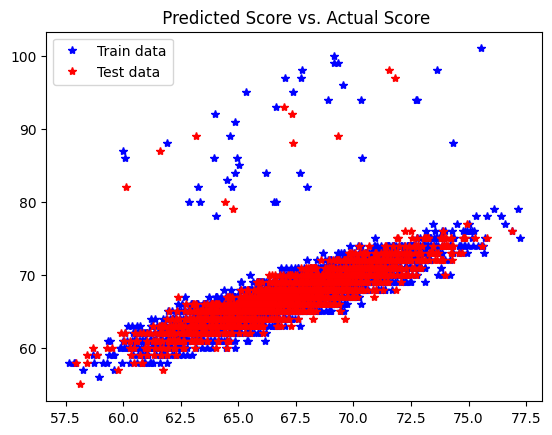

In [61]:
import matplotlib.pyplot as plt

plt.plot(ytrain_pred, y_train, 'b*')
plt.plot(ytest_pred, y_test, 'r*')

plt.title(" Predicted Score vs. Actual Score")
plt.legend(["Train data","Test data"])
plt.show()